# Traiter des données spatiales avec Python

Modules génériques :
 - **pathlib** : pour gérer les fichiers, compatible avec Windows, Linux et Mac
 - **datetime** : pour travailler avec des dates et des heures
 - **pandas** : pour analyser des données tabulées
 - **xarray** : pour travailler avec des données multi-dimensionnelles et labellisées (surcouche de pandas)
 - **matplotlib** : pour la visualisation
 - **folium** : pour la visualisation interactive (cartes Leaflet)

Modules pour les données spatiales :
 - **netCDF4** : pour utiliser le format NetCDF
 - **geopandas** : extension spatiale de pandas
 - **rasterio** : pour utiliser des données rasteur (gdal)
 - **shapely** : pour utiliser les données vecteur (gdal)
 - **rioxarray** : extension xarray de rasterio

In [54]:
import pathlib
import datetime as dt
import netCDF4 as nc 
import xarray as xr
import geopandas as gpd 
import rasterio 
import rasterio.plot 
import rioxarray as rio 
import shapely.geometry 

In [7]:
# Répertoire des données incluses dans le repository github pour le tutoriel
datadir = pathlib.Path("..", "..", "data")

In [8]:
datadir.is_dir()

True

## Lire un fichier netcdf

In [10]:
# Ouvrir un fichier netcdf avec xarray
nc_file = datadir / "202201_total_precipitation.nc"
f = xr.open_dataset(nc_file)

In [11]:
# Description du dataset xarray
f

<xarray.Dataset>
Dimensions:    (longitude: 151, latitude: 101, time: 744)
Coordinates:
  * longitude  (longitude) float32 -6.0 -5.9 -5.8 -5.7 -5.6 ... 8.7 8.8 8.9 9.0
  * latitude   (latitude) float32 52.0 51.9 51.8 51.7 ... 42.3 42.2 42.1 42.0
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-31T23:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-21 10:35:19 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

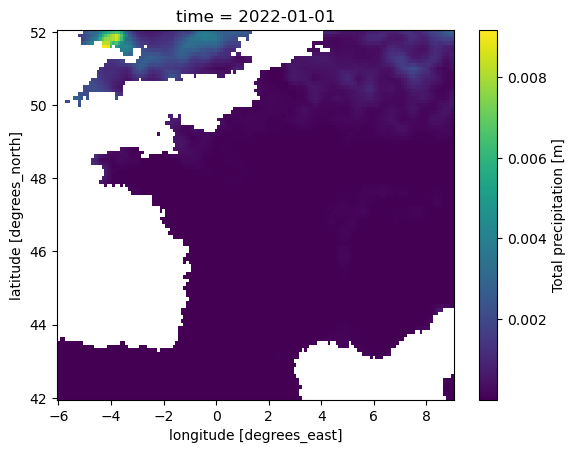

In [12]:
# Carte simple des données, pour le premier pas de temps
# ajouter la carte du monde en fond osm ? et utiliser folium directment ?
subset = f["tp"].isel({"time": 0})
subset.plot()

In [29]:
# Extraire du fichier la variable d'intérêt et la sauver dans un xarray
data = f["tp"]
data

<xarray.DataArray 'tp' (time: 744, latitude: 101, longitude: 151)>
[11346744 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -6.0 -5.9 -5.8 -5.7 -5.6 ... 8.7 8.8 8.9 9.0
  * latitude   (latitude) float32 52.0 51.9 51.8 51.7 ... 42.3 42.2 42.1 42.0
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-31T23:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

In [33]:
# Les coordonnées de la donnée :
data.coords

Coordinates:
  * longitude  (longitude) float32 -6.0 -5.9 -5.8 -5.7 -5.6 ... 8.7 8.8 8.9 9.0
  * latitude   (latitude) float32 52.0 51.9 51.8 51.7 ... 42.3 42.2 42.1 42.0
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-31T23:00:00

In [48]:
# Les valeurs de la donnée :
data.values[0:5,0:5,0:5]

array([[[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]]], dtype=float32)

## Lire un shapefile

In [39]:
# Ouvrir un shapefile avec geopandas
shp_occitanie = datadir / 'shapefiles' / 'departements-d-occitanie.shp'
occitanie = gpd.read_file(shp_occitanie)

In [38]:
# Les données sont sauvegardées dans un GeoDataFrame
occitanie

,annee,code_offici,nom_officie,code_iso_31,type,statut_depa,siren,est_une_ctu,geometry
0,2021,46,lot,FXX,dÃ©partement,rural,224600015,Non,"POLYGON ((2.20779 44.61577, 2.21089 44.60481, ..."
1,2021,81,tarn,FXX,dÃ©partement,rural,228100012,Non,"POLYGON ((2.93542 43.69456, 2.91903 43.68755, ..."
2,2021,31,haute-garonne,FXX,dÃ©partement,urbain,223100017,Non,"POLYGON ((1.68843 43.27355, 1.67922 43.27940, ..."
3,2021,30,gard,FXX,dÃ©partement,urbain,223000019,Non,"POLYGON ((4.73928 43.92413, 4.74023 43.91976, ..."
4,2021,32,gers,FXX,dÃ©partement,rural,223200015,Non,"POLYGON ((0.74189 44.06522, 0.75943 44.05007, ..."
5,2021,48,lozÃ¨re,FXX,dÃ©partement,rural,224800011,Non,"POLYGON ((3.36135 44.97141, 3.37158 44.96048, ..."
6,2021,66,pyrÃ©nÃ©es-orientales,FXX,dÃ©partement,urbain,226600013,Non,"POLYGON ((1.78614 42.57367, 1.79602 42.57147, ..."
7,2021,09,ariÃ¨ge,FXX,dÃ©partement,rural,220900013,Non,"POLYGON ((1.68843 43.27355, 1.70068 43.26197, ..."
8,2021,65,hautes-pyrÃ©nÃ©es,FXX,dÃ©partement,rural,226500015,Non,None
9,2021,12,aveyron,FXX,dÃ©partement,rural,221200017,Non,"POLYGON ((3.35822 43.91372, 3.34389 43.90599, ..."


In [40]:
# Sélection du département hérault dans le GeoDataFrame
herault = occitanie[occitanie['code_offici'] == '34']
herault

,annee,code_offici,nom_officie,code_iso_31,type,statut_depa,siren,est_une_ctu,geometry
12,2021,34,hÃ©rault,FXX,dÃ©partement,urbain,223400011,Non,"POLYGON ((3.35822 43.91372, 3.37010 43.91726, ..."


In [20]:
# Vérifier les coordonnées du département (latitude et longitude min et max)
herault.bounds

,minx,miny,maxx,maxy
12,2.544676,43.212777,4.194419,43.971878


In [24]:
# Vérifier que le CRS est bien défini
# Si ce n'est pas le cas, le rajouter avec la commande suivante :
# herault.crs = 'EPSG:4326'
herault.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# Plot interactif pour vérifier la localisation du shapefile
herault.explore()

## Extraire des données sur un shapefile

In [50]:
# Les données doivent avoir une projection définie pour pouvoir faire une extraction géographique
# Ajout du CRS avec le package rioxarray (?)
# Une coordonnées supplémentaire apparaît : spatial_ref
data.rio.write_crs("EPSG:4326", inplace=True)

<xarray.DataArray 'tp' (time: 744, latitude: 101, longitude: 151)>
array([[[         nan,          nan, ..., 2.811687e-03, 2.804998e-03],
        [         nan,          nan, ..., 2.328100e-03, 2.311854e-03],
        ...,
        [2.007186e-05, 2.771616e-05, ..., 2.962723e-05, 3.822148e-06],
        [8.601695e-06, 1.815706e-05, ..., 6.212294e-05, 1.720339e-05]],

       [[         nan,          nan, ..., 1.147017e-05, 1.242384e-05],
        [         nan,          nan, ..., 6.690621e-06, 8.601695e-06],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 6.690621e-06, 9.573996e-07],
        [0.000000e+00, 0.000000e+00, ..., 1.051277e-05, 2.868474e-06]],

       ...,

       [[         nan,          nan, ..., 8.017419e-03, 8.036532e-03],
        [         nan,          nan, ..., 8.161729e-03, 8.257300e-03],
        ...,
        [1.911074e-06, 1.911074e-06, ..., 6.498769e-05, 1.529232e-05],
        [1.911074e-06, 1.911074e-06, ..., 1.070388e-04, 3.536046e-05]],

       [[         nan,          nan, ..., 8.048957e-03, 8.062337e-03],
        [         nan,          nan, ..., 8.199958e-03, 8.289794e-03],
        ...,
        [1.911074e-06, 1.911074e-06, ..., 6.498769e-05, 1.529232e-05],
        [1.911074e-06, 1.911074e-06, ..., 1.070388e-04, 3.536046e-05]]],
      dtype=float32)
Coordinates:
  * longitude    (longitude) float32 -6.0 -5.9 -5.8 -5.7 ... 8.7 8.8 8.9 9.0
  * latitude     (latitude) float32 52.0 51.9 51.8 51.7 ... 42.3 42.2 42.1 42.0
  * time         (time) datetime64[ns] 2022-01-01 ... 2022-01-31T23:00:00
    spatial_ref  int64 0
Attributes:
    units:      m
    long_name:  Total precipitation

In [51]:
# Extraire les données du xarray sur l'Hérault :
# donc ne conserver ie keep only data over the minimal bounding box surrounding the shape
# and masking the data outside the shape with NaN
extract = data.rio.clip(herault.geometry.apply(shapely.geometry.mapping), herault.crs, drop=True)

In [52]:
extract

<xarray.DataArray 'tp' (time: 744, latitude: 7, longitude: 16)>
array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
         1.5292317e-05, 2.1982938e-05,           nan],
        [          nan,           nan,           nan, ...,
         1.7203391e-05, 2.5805086e-05, 3.3449382e-05],
        ...,
        [          nan, 9.5739961e-07, 9.5739961e-07, ...,
                   nan,           nan,           nan],
        [3.8221478e-06, 3.8221478e-06, 3.8221478e-06, ...,
                   nan,           nan,           nan],
        [          nan,           nan, 1.8157065e-05, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
         2.8684735e-06, 4.7795475e-06,           nan],
        [          nan,           nan,           nan, ...,
         3.8221478e-06, 5.7332218e-06, 7.6442957e-06],
...
        [          nan, 3.8495846e-03, 3.5160426e-03, ...,
                   nan,           nan,           nan],
        [2.8422698e-03, 2.2975169e-03, 1.9697100e-03, ...,
                   nan,           nan,           nan],
        [          nan,           nan, 1.5023705e-03, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
         3.5360456e-05, 3.0584633e-05,           nan],
        [          nan,           nan,           nan, ...,
         9.5590949e-06, 8.6016953e-06, 5.7332218e-06],
        ...,
        [          nan, 3.9528012e-03, 3.6077909e-03, ...,
                   nan,           nan,           nan],
        [2.9225498e-03, 2.3280997e-03, 1.9916911e-03, ...,
                   nan,           nan,           nan],
        [          nan,           nan, 1.5281737e-03, ...,
                   nan,           nan,           nan]]], dtype=float32)
Coordinates:
  * latitude     (latitude) float64 43.9 43.8 43.7 43.6 43.5 43.4 43.3
  * longitude    (longitude) float64 2.6 2.7 2.8 2.9 3.0 ... 3.7 3.8 3.9 4.0 4.1
  * time         (time) datetime64[ns] 2022-01-01 ... 2022-01-31T23:00:00
    spatial_ref  int64 0
Attributes:
    units:      m
    long_name:  Total precipitation

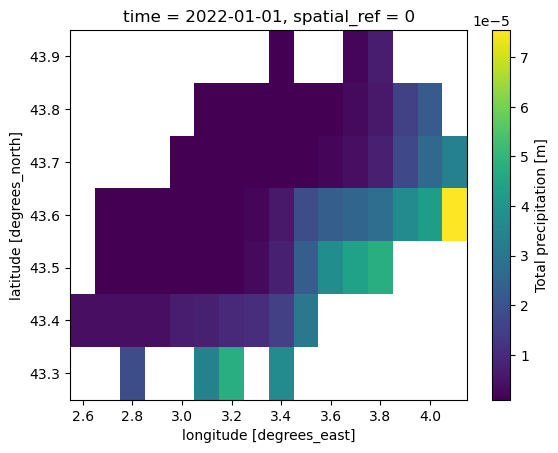

In [53]:
# Plot first time step, to check the extraction
extract.isel({"time":0}).plot()

In [35]:
# Save extracted data as netcdf file
#data.to_netcdf(ncdir / f".nc")

In [37]:
# Save extracted data as geotiff
#skt.rio.to_raster(raster_path=ncdir / f"{parameter}_galougo.tif")